In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Model with dap-seq features
# Import T/F data
at_df = pd.read_csv("model_data/Model_input_data.tsv", sep="\t", header=0,index_col=0)
at_df_T = at_df[at_df.deg == 1].reset_index(drop=True)
at_df_F = at_df[at_df.deg == 0].reset_index(drop=True)

In [3]:
import random
from pycaret.classification import *
from sklearn.utils import shuffle

In [4]:
# Generate balance data and test set with multiple random_state value
balance_index = random.sample(range(100,1000),100)
test_set_index = random.sample(range(100,1000),100)

# Loop the random_state
AUC_list=[]
for i in range(100):
    at_df_F_use = at_df_F.sample(len(at_df_T),
                                 random_state = balance_index[i]).reset_index(drop=True)
    at_df_balance = at_df_T.append(at_df_F_use).reset_index(drop=True)
    gene_names=at_df.index
    at_df_label = at_df_balance['deg']
    at_df_balance_cor = at_df_balance[at_df_balance.corr().deg[
        abs(at_df_balance.corr().deg) > 0.1].index]

    TF_classify_balance_cor = setup(data=at_df_balance_cor,
                                    target='deg',
                                    train_size=0.7,
                                    silent=True,
                                    fold=10,
                                    normalize=True,
                                    normalize_method='zscore',
                                    feature_selection=True,
                                    pca=False,
                                    session_id=test_set_index[i],
                                    html=True)

    best_model = create_model('rf')
    prediction = predict_model(best_model)
    results=pull()
    AUC_list.append(results.AUC.array[0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7368,0.7944,0.6000,0.8571,0.7059,0.4809,0.5060
1,0.7368,0.7333,0.8000,0.7273,0.7619,0.4693,0.4719
2,0.6316,0.7667,0.7000,0.6364,0.6667,0.2570,0.2584
3,0.6316,0.6944,0.5000,0.7143,0.5882,0.2732,0.2875
4,0.7368,0.9000,0.6000,0.8571,0.7059,0.4809,0.5060
5,0.7368,0.8056,0.7778,0.7000,0.7368,0.4751,0.4778
6,0.8421,0.8667,0.8889,0.8000,0.8421,0.6851,0.6889
7,0.6316,0.6667,0.3333,0.7500,0.4615,0.2400,0.2858
8,0.7368,0.6611,0.6667,0.7500,0.7059,0.4693,0.4719


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7195,0.7391,0.6585,0.7500,0.7013,0.4390,0.4423


In [5]:
# Model without dap features
# Import T/F data
at_df_no_dap = pd.read_csv("model_data/no_dap.tsv", sep="\t", header=0,index_col=0)
at_df_no_dap_T = at_df_no_dap[at_df_no_dap.deg == 1].reset_index(drop=True)
at_df_no_dap_F = at_df_no_dap[at_df_no_dap.deg == 0].reset_index(drop=True)

In [6]:
# Generate balance data and test set with multiple random_state value
balance_index = random.sample(range(100,1000),100)
test_set_index = random.sample(range(100,1000),100)

# Loop the random_state
AUC_no_dap_list=[]
for i in range(100):
    at_df_no_dap_F_use = at_df_no_dap_F.sample(len(at_df_no_dap_T),
                                 random_state = balance_index[i]).reset_index(drop=True)
    at_df_no_dap_balance = at_df_no_dap_T.append(at_df_no_dap_F_use).reset_index(drop=True)
    gene_names=at_df.index
    at_df_no_dap_label = at_df_no_dap_balance['deg']
    at_df_no_dap_balance_cor = at_df_no_dap_balance[at_df_no_dap_balance.corr().deg[
        abs(at_df_no_dap_balance.corr().deg) > 0.1].index]

    TF_classify_balance_cor = setup(data=at_df_no_dap_balance_cor,
                                    target='deg',
                                    train_size=0.7,
                                    silent=True,
                                    fold=10,
                                    normalize=True,
                                    normalize_method='zscore',
                                    feature_selection=True,
                                    pca=False,
                                    session_id=test_set_index[i],
                                    html=True)

    best_model = compare_models(sort='AUC')
    prediction = predict_model(best_model)
    results=pull()
    AUC_no_dap_list.append(results.AUC.array[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6263,0.7020,0.6182,0.6695,0.6345,0.2540,0.2608,0.0030
lda,Linear Discriminant Analysis,0.6316,0.6987,0.6573,0.6634,0.6544,0.2602,0.2651,0.0020
qda,Quadratic Discriminant Analysis,0.6158,0.6974,0.3918,0.7600,0.4908,0.2593,0.2922,0.0020
et,Extra Trees Classifier,0.6421,0.6910,0.6473,0.6757,0.6558,0.2835,0.2897,0.0270
lightgbm,Light Gradient Boosting Machine,0.6105,0.6910,0.6264,0.6536,0.6300,0.2184,0.2226,0.1030
nb,Naive Bayes,0.5895,0.6883,0.3527,0.6817,0.4427,0.2113,0.2244,0.0020
gbc,Gradient Boosting Classifier,0.6316,0.6848,0.6264,0.6749,0.6405,0.2625,0.2697,0.0090
rf,Random Forest Classifier,0.6105,0.6843,0.6073,0.6452,0.6214,0.2219,0.2253,0.0340
xgboost,Extreme Gradient Boosting,0.6158,0.6744,0.6273,0.6548,0.6320,0.2296,0.2350,0.1190
ada,Ada Boost Classifier,0.5947,0.6645,0.6473,0.6130,0.6257,0.1833,0.1920,0.0120


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6585,0.7475,0.6176,0.5833,0.6000,0.3026,0.3029


In [7]:
# Model without signal features
# Import T/F data
at_df_no_signal = pd.read_csv("model_data/no_signal.tsv", sep="\t", header=0,index_col=0)
at_df_no_signal_T = at_df_no_signal[at_df_no_signal.deg == 1].reset_index(drop=True)
at_df_no_signal_F = at_df_no_signal[at_df_no_signal.deg == 0].reset_index(drop=True)

In [8]:
# Generate balance data and test set with multiple random_state value
balance_index = random.sample(range(100,1000),100)
test_set_index = random.sample(range(100,1000),100)

# Loop the random_state
AUC_no_signal_list=[]
for i in range(100):
    at_df_no_signal_F_use = at_df_no_signal_F.sample(len(at_df_no_signal_T),
                                 random_state = balance_index[i]).reset_index(drop=True)
    at_df_no_signal_balance = at_df_no_signal_T.append(at_df_no_signal_F_use).reset_index(drop=True)
    gene_names=at_df.index
    at_df_no_signal_label = at_df_no_signal_balance['deg']
    at_df_no_signal_balance_cor = at_df_no_signal_balance[at_df_no_signal_balance.corr().deg[
        abs(at_df_no_signal_balance.corr().deg) > 0.1].index]

    TF_classify_balance_cor = setup(data=at_df_no_signal_balance_cor,
                                    target='deg',
                                    train_size=0.7,
                                    silent=True,
                                    fold=10,
                                    normalize=True,
                                    normalize_method='zscore',
                                    feature_selection=True,
                                    pca=False,
                                    session_id=test_set_index[i],
                                    html=True)

    best_model = create_model('rf')
    prediction = predict_model(best_model)
    results=pull()
    AUC_no_signal_list.append(results.AUC.array[0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7895,0.8056,0.6667,0.8571,0.7500,0.5730,0.5866
1,0.7368,0.8333,0.7778,0.7000,0.7368,0.4751,0.4778
2,0.6316,0.8611,0.9000,0.6000,0.7200,0.2400,0.2858
3,0.5789,0.6667,0.6000,0.6000,0.6000,0.1556,0.1556
4,0.6842,0.6722,0.8000,0.6667,0.7273,0.3596,0.3680
5,0.6842,0.7333,0.6000,0.7500,0.6667,0.3736,0.3820
6,0.8421,0.9500,0.9000,0.8182,0.8571,0.6816,0.6854
7,0.7895,0.9222,0.7000,0.8750,0.7778,0.5824,0.5955
8,0.6842,0.8500,0.6000,0.7500,0.6667,0.3736,0.3820


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7195,0.7569,0.7105,0.6923,0.7013,0.4370,0.4371


In [9]:
# Model without fpkm features
# Import T/F data
at_df_no_fpkm = pd.read_csv("model_data/no_fpkm.tsv", sep="\t", header=0,index_col=0)
at_df_no_fpkm_T = at_df_no_fpkm[at_df_no_fpkm.deg == 1].reset_index(drop=True)
at_df_no_fpkm_F = at_df_no_fpkm[at_df_no_fpkm.deg == 0].reset_index(drop=True)

In [10]:
# Generate balance data and test set with multiple random_state value
balance_index = random.sample(range(100,1000),100)
test_set_index = random.sample(range(100,1000),100)

# Loop the random_state
AUC_no_fpkm_list=[]
for i in range(100):
    at_df_no_fpkm_F_use = at_df_no_fpkm_F.sample(len(at_df_no_fpkm_T),
                                 random_state = balance_index[i]).reset_index(drop=True)
    at_df_no_fpkm_balance = at_df_no_fpkm_T.append(at_df_no_fpkm_F_use).reset_index(drop=True)
    gene_names=at_df.index
    at_df_no_fpkm_label = at_df_no_fpkm_balance['deg']
    at_df_no_fpkm_balance_cor = at_df_no_fpkm_balance[at_df_no_fpkm_balance.corr().deg[
        abs(at_df_no_fpkm_balance.corr().deg) > 0.1].index]

    TF_classify_balance_cor = setup(data=at_df_no_fpkm_balance_cor,
                                    target='deg',
                                    train_size=0.7,
                                    silent=True,
                                    fold=10,
                                    normalize=True,
                                    normalize_method='zscore',
                                    feature_selection=True,
                                    pca=False,
                                    session_id=test_set_index[i],
                                    html=True)

    best_model = create_model('rf')
    prediction = predict_model(best_model)
    results=pull()
    AUC_no_fpkm_list.append(results.AUC.array[0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6316,0.8667,0.5556,0.6250,0.5882,0.2570,0.2584
1,0.6842,0.7556,0.7778,0.6364,0.7000,0.3736,0.3820
2,0.7368,0.8111,0.7778,0.7000,0.7368,0.4751,0.4778
3,0.5789,0.7722,0.7778,0.5385,0.6364,0.1739,0.1910
4,0.6316,0.6389,0.4444,0.6667,0.5333,0.2486,0.2626
5,0.7368,0.7556,0.6667,0.7500,0.7059,0.4693,0.4719
6,0.6842,0.7556,0.7000,0.7000,0.7000,0.3667,0.3667
7,0.6842,0.7778,0.7000,0.7000,0.7000,0.3667,0.3667
8,0.7895,0.8500,0.8000,0.8000,0.8000,0.5778,0.5778


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6707,0.7798,0.7143,0.6667,0.6897,0.3399,0.3408


/Users/rensibo/miniforge3/envs/ML/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/rensibo/miniforge3/envs/ML/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/rensibo/miniforge3/envs/ML/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/rensibo/miniforge3/envs/ML/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/rensibo/miniforge3/en

/Users/rensibo/miniforge3/envs/ML/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/rensibo/miniforge3/envs/ML/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/rensibo/miniforge3/envs/ML/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do th

/Users/rensibo/miniforge3/envs/ML/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/rensibo/miniforge3/envs/ML/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/rensibo/miniforge3/envs/ML/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/rensibo/miniforge3/envs/ML/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/rensibo/miniforge3/en

/Users/rensibo/miniforge3/envs/ML/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/rensibo/miniforge3/envs/ML/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/rensibo/miniforge3/envs/ML/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/rensibo/miniforge3/envs/ML/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/rensibo/miniforge3/en

/Users/rensibo/miniforge3/envs/ML/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/rensibo/miniforge3/envs/ML/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/rensibo/miniforge3/envs/ML/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/rensibo/miniforge3/envs/ML/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/rensibo/miniforge3/en

In [11]:
# Model without distance features
# Import T/F data
at_df_no_distance = pd.read_csv("model_data/no_distance.tsv", sep="\t", header=0,index_col=0)
at_df_no_distance_T = at_df_no_distance[at_df_no_distance.deg == 1].reset_index(drop=True)
at_df_no_distance_F = at_df_no_distance[at_df_no_distance.deg == 0].reset_index(drop=True)

In [12]:
# Generate balance data and test set with multiple random_state value
balance_index = random.sample(range(100,1000),100)
test_set_index = random.sample(range(100,1000),100)

# Loop the random_state
AUC_no_distance_list=[]
for i in range(100):
    at_df_no_distance_F_use = at_df_no_distance_F.sample(len(at_df_no_distance_T),
                                 random_state = balance_index[i]).reset_index(drop=True)
    at_df_no_distance_balance = at_df_no_distance_T.append(at_df_no_distance_F_use).reset_index(drop=True)
    gene_names=at_df.index
    at_df_no_distance_label = at_df_no_distance_balance['deg']
    at_df_no_distance_balance_cor = at_df_no_distance_balance[at_df_no_distance_balance.corr().deg[
        abs(at_df_no_distance_balance.corr().deg) > 0.1].index]

    TF_classify_balance_cor = setup(data=at_df_no_distance_balance_cor,
                                    target='deg',
                                    train_size=0.7,
                                    silent=True,
                                    fold=10,
                                    normalize=True,
                                    normalize_method='zscore',
                                    feature_selection=True,
                                    pca=False,
                                    session_id=test_set_index[i],
                                    html=True)

    best_model = create_model('rf')
    prediction = predict_model(best_model)
    results=pull()
    AUC_no_distance_list.append(results.AUC.array[0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5789,0.6278,0.7000,0.5833,0.6364,0.1461,0.1495
1,0.7368,0.7833,0.8000,0.7273,0.7619,0.4693,0.4719
2,0.7368,0.7833,0.8000,0.7273,0.7619,0.4693,0.4719
3,0.7368,0.7889,0.8000,0.7273,0.7619,0.4693,0.4719
4,0.6316,0.6889,0.6000,0.6667,0.6316,0.2652,0.2667
5,0.6316,0.6056,0.5000,0.7143,0.5882,0.2732,0.2875
6,0.6316,0.7278,0.7000,0.6364,0.6667,0.2570,0.2584
7,0.6316,0.7167,0.7000,0.6364,0.6667,0.2570,0.2584
8,0.6316,0.6722,0.7000,0.6364,0.6667,0.2570,0.2584


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.5854,0.7346,0.6667,0.5217,0.5854,0.1829,0.1884


In [13]:
# Compare AUC of models with features deleted
import seaborn as sns
import matplotlib.pyplot as plt

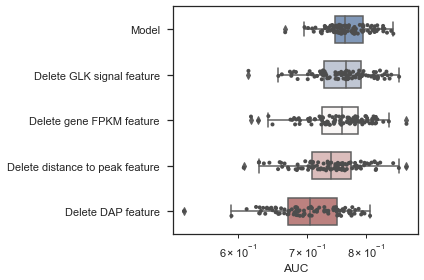

In [14]:
AUC_value = AUC_list+AUC_no_signal_list+AUC_no_fpkm_list+AUC_no_distance_list+AUC_no_dap_list
model=['Model']*100  + ['Delete GLK signal feature']*100+['Delete gene FPKM feature']*100+['Delete distance to peak feature']*100+ ['Delete DAP feature']*100

plot_data = {'AUC' : AUC_value, 'model':model}
plot_df = pd.DataFrame(plot_data)

sns.set_theme(style="ticks")

f, ax = plt.subplots()
ax.set_xscale("log")

sns.boxplot(x="AUC", y="model", data=plot_df,
            width=.6, palette="vlag")

sns.stripplot(x="AUC", y="model", data=plot_df,
              size=4, color=".3", linewidth=0)

ax.xaxis.grid(True)
ax.set(ylabel="")
fig=ax.get_figure()
fig.tight_layout()
fig.savefig("Model comparison.pdf",dpi=1000)

In [15]:
# Average AUC of models
Class_group=plot_df.groupby('model')
Class_group.mean()

,AUC
model,
Delete DAP feature,0.705732
Delete GLK signal feature,0.761693
Delete distance to peak feature,0.740532
Delete gene FPKM feature,0.754568
Model,0.769153
